# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [3]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!apt install statsmodels

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package statsmodels


In [5]:
pip show statsmodels

Name: statsmodels
Version: 0.13.5
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: plotnine


In [117]:
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.api as smf
import patsy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [7]:
df = pd.read_csv('previsao_de_renda.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [9]:
#limpando a base para termos apenas o dataset com as variáveis que tem informações validas.

X = df[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 
          'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']]

In [10]:
y = df[['renda']]

In [11]:
X.shape

(15000, 11)

In [12]:
y.shape

(15000, 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [14]:
X_train.shape

(11250, 11)

In [15]:
X_test.shape

(3750, 11)

In [16]:
y_train.shape

(11250, 1)

In [17]:
y_test.shape

(3750, 1)

*2*. Rode uma regularização ridge com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o  R2  na base de testes. Qual o melhor modelo?

*Como vemos abaixo, os resultados são basicamente similares*

In [45]:
print('R² para alpha 0,000 em uma Regularizaçaõ Ridge:', r2_alpha_0, '\n' 
      'R² para alpha 0,001 em uma Regularizaçaõ Ridge:', r2_alpha_0001, '\n'
      'R² para alpha 0,005 em uma Regularizaçaõ Ridge:', r2_alpha_0005, '\n'
      'R² para alpha 0,010 em uma Regularizaçaõ Ridge:', r2_alpha_001, '\n'
      'R² para alpha 0,050 em uma Regularizaçaõ Ridge:', r2_alpha_005, '\n'
      'R² para alpha 0,100 em uma Regularizaçaõ Ridge:', r2_alpha_01, '\n')

R² para alpha 0,000 em uma Regularizaçaõ Ridge: 0.25622676364926744 
R² para alpha 0,001 em uma Regularizaçaõ Ridge: 0.25622676364738883 
R² para alpha 0,005 em uma Regularizaçaõ Ridge: 0.256226763602342 
R² para alpha 0,010 em uma Regularizaçaõ Ridge: 0.256226763461765 
R² para alpha 0,050 em uma Regularizaçaõ Ridge: 0.2562267590013262 
R² para alpha 0,100 em uma Regularizaçaõ Ridge: 0.2562267452526922 



In [19]:
formula = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia'

In [20]:
y_test, X_test = patsy.dmatrices(formula, data=df, return_type='dataframe')

In [21]:
modelo = Ridge(alpha=0)

In [22]:
modelo.fit(X_test, y_test)

Ridge(alpha=0)

In [23]:
r2_alpha_0 = modelo.score(X_test, y_test)

In [24]:
print(r2_alpha_0)

0.25622676364926744


In [25]:
modelo = Ridge(alpha=0.001)

In [26]:
modelo.fit(X_test, y_test)

Ridge(alpha=0.001)

In [27]:
r2_alpha_0001 = modelo.score(X_test, y_test)

In [28]:
print(r2_alpha_0001)

0.25622676364738883


In [29]:
modelo = Ridge(alpha=0.005)

In [30]:
modelo.fit(X_test, y_test)

Ridge(alpha=0.005)

In [31]:
r2_alpha_0005 = modelo.score(X_test, y_test)

In [32]:
print(r2_alpha_0005)

0.256226763602342


In [33]:
modelo = Ridge(alpha=0.01)

In [34]:
modelo.fit(X_test, y_test)

Ridge(alpha=0.01)

In [35]:
r2_alpha_001 = modelo.score(X_test, y_test)

In [36]:
print(r2_alpha_001)

0.256226763461765


In [37]:
modelo = Ridge(alpha=0.05)

In [38]:
modelo.fit(X_test, y_test)

Ridge(alpha=0.05)

In [39]:
r2_alpha_005 = modelo.score(X_test, y_test)

In [40]:
print(r2_alpha_005)

0.2562267590013262


In [41]:
modelo = Ridge(alpha=0.1)

In [42]:
modelo.fit(X_test, y_test)

Ridge(alpha=0.1)

In [43]:
r2_alpha_01 = modelo.score(X_test, y_test)

In [44]:
print(r2_alpha_01)

0.2562267452526922



3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

In [72]:
print('R² para alpha 0,000 em uma Regularização Lasso:', r2_lasso_a0, '\n' 
      'R² para alpha 0,001 em uma Regularização Lasso:', r2_lasso_a0001, '\n'
      'R² para alpha 0,005 em uma Regularização Lasso:', r2_lasso_a0005, '\n'
      'R² para alpha 0,010 em uma Regularização Lasso:', r2_lasso_a001, '\n'
      'R² para alpha 0,050 em uma Regularização Lasso:', r2_lasso_a005, '\n'
      'R² para alpha 0,100 em uma Regularização Lasso:', r2_lasso_a01, '\n')

R² para alpha 0,000 em uma Regularização Lasso: 0.2562267452526922 
R² para alpha 0,001 em uma Regularização Lasso: 0.2562267548307241 
R² para alpha 0,005 em uma Regularização Lasso: 0.256226744832037 
R² para alpha 0,010 em uma Regularização Lasso: 0.2562267252441235 
R² para alpha 0,050 em uma Regularização Lasso: 0.25622628497165423 
R² para alpha 0,100 em uma Regularização Lasso: 0.2562250257337363 



In [49]:
modelo = Lasso(alpha=0)

In [47]:
modelo.fit(X_test, y_test)

Ridge(alpha=0.1)

In [48]:
r2_lasso_a0 = modelo.score(X_test, y_test)

In [50]:
print(r2_lasso_a0)

0.2562267452526922


In [51]:
modelo = Lasso(alpha=0.001)

In [52]:
modelo.fit(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+11, tolerance: 9.821e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [54]:
r2_lasso_a0001 = modelo.score(X_test, y_test)

In [55]:
print(r2_lasso_a0001)

0.2562267548307241


In [56]:
modelo = Lasso(alpha=0.005)

In [57]:
modelo.fit(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.361e+11, tolerance: 9.821e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.005)

In [58]:
r2_lasso_a0005 = modelo.score(X_test, y_test)

In [59]:
print(r2_lasso_a0005)

0.256226744832037


In [60]:
modelo = Lasso(alpha=0.01)

In [61]:
modelo.fit(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.100e+11, tolerance: 9.821e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [62]:
r2_lasso_a001 = modelo.score(X_test, y_test)

In [ ]:
print(r2_lasso_a001)

In [63]:
modelo = Lasso(alpha=0.05)

In [64]:
modelo.fit(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.721e+11, tolerance: 9.821e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.05)

In [65]:
r2_lasso_a005 = modelo.score(X_test, y_test)

In [66]:
print(r2_lasso_a005)

0.25622628497165423


In [67]:
modelo = Lasso(alpha=0.1)

In [68]:
modelo.fit(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.127e+10, tolerance: 9.821e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [70]:
r2_lasso_a01 = modelo.score(X_test, y_test)

In [71]:
print(r2_lasso_a01)

0.2562250257337363


4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?

In [73]:
model = smf.OLS(y_test, smf.add_constant(X_test)).fit()

In [74]:
selected_features = model.pvalues[model.pvalues <= 0.05].index.tolist()
while True:
    model = smf.OLS(y_test, smf.add_constant(X_test[selected_features])).fit()
    pvalues = model.pvalues.iloc[1:]
    if (pvalues > 0.05).sum() == 0:
        break
    else:
        remove_feature = pvalues.idxmax()
        selected_features.remove(remove_feature)

In [75]:
y_pred = model.predict(smf.add_constant(X_test[selected_features]))
r2 = r2_score(y_test, y_pred)
print('R2 na base de teste:', r2)

R2 na base de teste: 0.2538982030072172


5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?

Todas os modelos tiveram um r-quadrado bem próximos, com os modelos de *Lasso* e *Ridge* com ***alpha 0***, tendo um pouco mais de eficiência.  

6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [76]:
df_2 = df[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 
          'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]

In [77]:
df_2.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


Primeira versão usando apenas a regressão padrão.

In [78]:
md = ols(formula='renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia', data =df_2).fit()

In [79]:
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:52:44   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Transformando 'renda' em log, para melhorar o r-quadrado.

In [80]:
md_2 = ols(formula='np.log(renda) ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + np.log(idade) + tempo_emprego + qt_pessoas_residencia', data =df_2).fit()

In [81]:
print(md_2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:52:49   Log-Likelihood:                -13567.
No. Observations:               12427   AIC:                         2.718e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

A árvore de regressão mostrou a importância das varáveis 'tempo de emprego', 'sexo' e 'tipo_renda' na renda, mas já tinha usado essas varáveis para fazer na correlação anterior do exercício 6. Porém com a árvore conseguimos ter um modelo mais enxuto.

In [142]:
regr_1 = DecisionTreeRegressor(max_depth=4)

In [143]:
regr_1.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=4)

In [144]:
mse1 = regr_1.score(X_test, y_test)
template = 'O R-quadrado da árvore com profundidade={0} é: {1:.2f}'

print(template.format(regr_1.get_depth(),mse1).replace('.',','))

O R-quadrado da árvore com profundidade=4 é: 0,48


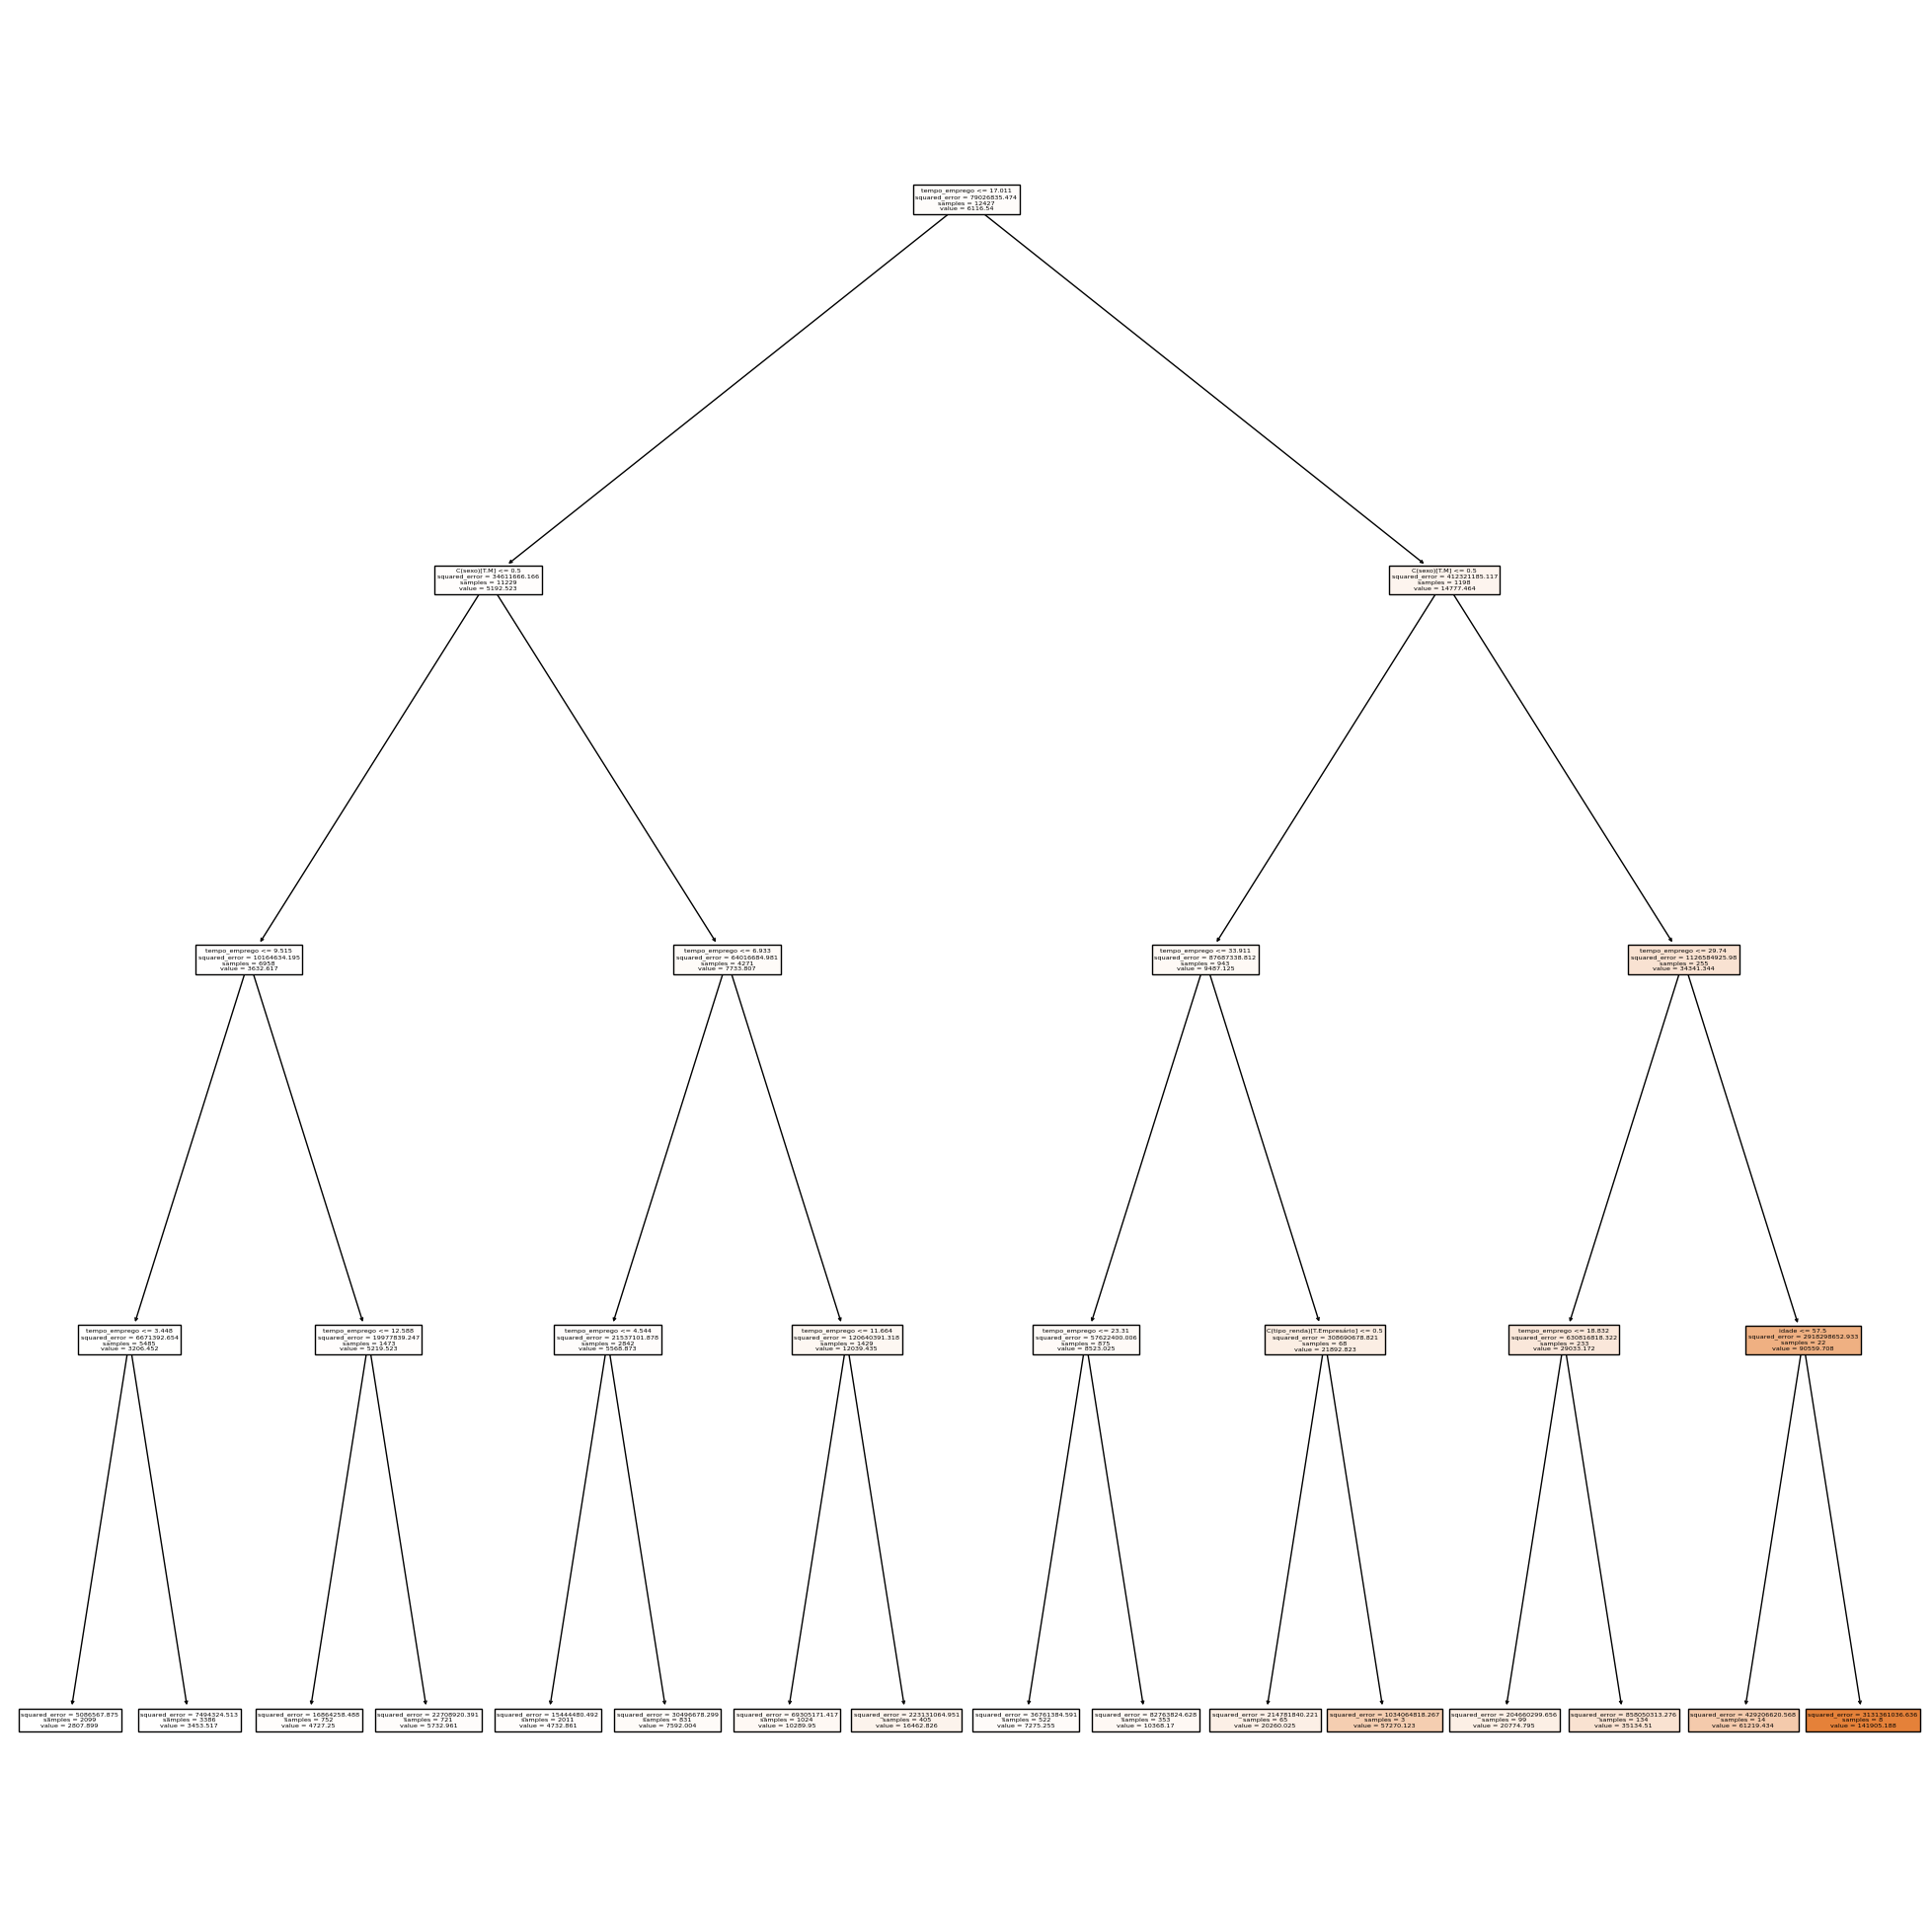

In [147]:
plt.rc('figure', figsize=(25,25))
tp = tree.plot_tree(regr_1,
                    feature_names=X_test.columns,
                    filled=True)

In [184]:
md_3 = ols(formula='np.log(renda) ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + np.log(idade) + tempo_emprego + qt_pessoas_residencia', data =df_2).fit()

In [185]:
print(md_3.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     343.9
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:23:48   Log-Likelihood:                -13575.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12406   BIC:                         2.735e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [200]:
md_4 = ols(formula='np.log(renda) ~ tempo_emprego + np.log(idade) + C(tipo_renda) + C(sexo)', data =df_2).fit()

In [201]:
print(md_4.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     953.5
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:28:45   Log-Likelihood:                -13644.
No. Observations:               12427   AIC:                         2.730e+04
Df Residuals:                   12419   BIC:                         2.736e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc